<a href="https://colab.research.google.com/github/nmomeni-azan/EE860_Project_Momeni_Project2/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.3 MB/s e

In [4]:
import pycaret
pycaret.__version__

'3.2.0'

In [5]:
from pycaret.datasets import get_data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('/content/drive/MyDrive/ML_Project/abalone.csv')
data.Sex

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [8]:
from pycaret.classification import *
s = setup(data, target = 'Sex')

,Description,Value
0,Session id,7988
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [9]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
type(exp)
exp.setup(data, target = 'Sex', session_id = 4806)

,Description,Value
0,Session id,4806
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [10]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5573,0.7536,0.5573,0.5476,0.5393,0.3304,0.3375,1.4020
rf,Random Forest Classifier,0.5522,0.7478,0.5522,0.5464,0.5479,0.3258,0.3267,0.9070
ridge,Ridge Classifier,0.5453,0.0000,0.5453,0.5292,0.5246,0.3152,0.3222,0.0400
gbc,Gradient Boosting Classifier,0.5446,0.7466,0.5446,0.5354,0.5352,0.3121,0.3151,1.7510
lda,Linear Discriminant Analysis,0.5429,0.7470,0.5429,0.5347,0.5313,0.3093,0.3133,0.0450
lightgbm,Light Gradient Boosting Machine,0.5416,0.7382,0.5416,0.5359,0.5371,0.3101,0.3111,1.2640
ada,Ada Boost Classifier,0.5395,0.7231,0.5395,0.5257,0.5236,0.3061,0.3109,0.2100
xgboost,Extreme Gradient Boosting,0.5371,0.7287,0.5371,0.5364,0.5361,0.3038,0.3041,0.2960
et,Extra Trees Classifier,0.5337,0.7418,0.5337,0.5263,0.5286,0.2983,0.2990,0.3870
qda,Quadratic Discriminant Analysis,0.5204,0.7328,0.5204,0.5046,0.4858,0.2769,0.2900,0.0430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [12]:
automl()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7988, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

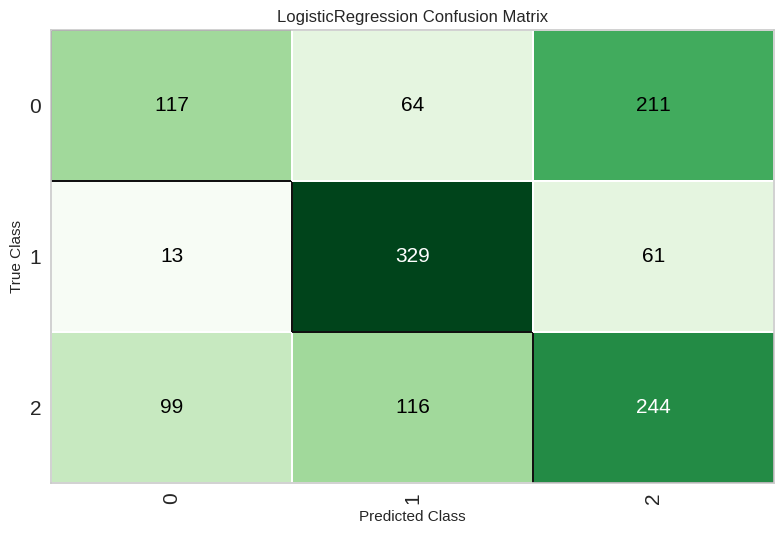

In [13]:
plot_model(best, plot = 'confusion_matrix')

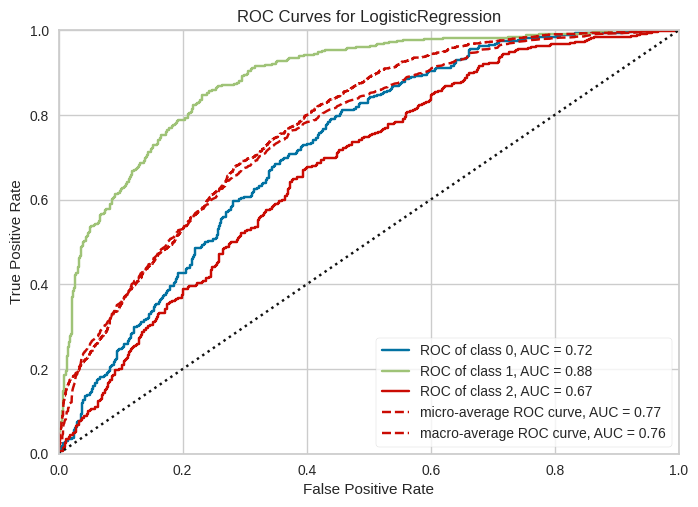

In [14]:
plot_model(best, plot = 'auc')

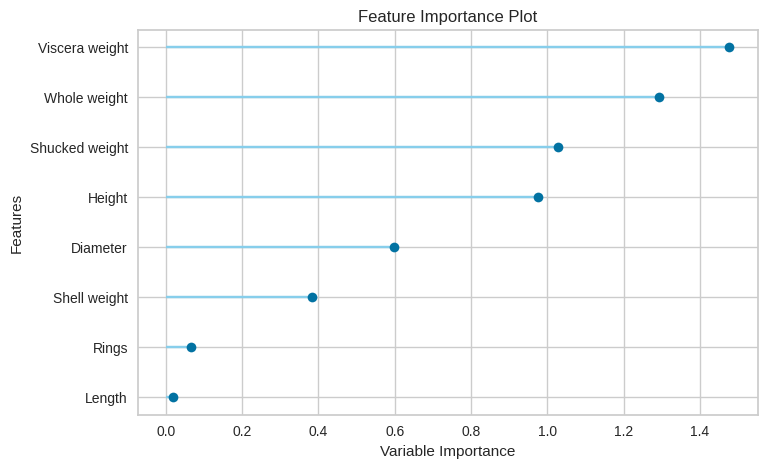

In [15]:
plot_model(best, plot = 'feature')

In [23]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5502,0.7564,0.5502,0.5405,0.5329,0.3205,0.3270


In [18]:
holdout_pred.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,prediction_label,prediction_score
1065,0.315,0.235,0.055,0.1510,0.0650,0.0270,0.0390,6,I,I,0.8272
1053,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,4,I,I,0.8573
4097,0.635,0.500,0.180,1.2915,0.5940,0.2695,0.3700,9,M,M,0.4963
2754,0.525,0.385,0.130,0.6070,0.2355,0.1250,0.1950,8,I,I,0.5056
1751,0.710,0.540,0.205,1.5805,0.8020,0.2870,0.4350,10,F,M,0.5371


In [19]:
new_data = data.copy()
new_data.drop('Sex', axis=1, inplace=True)
new_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
predictions = predict_model(best, data = new_data)
predictions.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,prediction_label,prediction_score
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M,0.4612
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,I,0.7633
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,I,0.3913
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,I,0.4225
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I,0.7669


In [21]:
save_model(best, 'my_first_pipline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole weight', 'Shucked weight',
                                              'Viscera weight', 'Shell weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                         

In [22]:
loaded_best_pipeline = load_model('/content/my_first_pipline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole weight', 'Shucked weight',
                                             'Viscera weight', 'Shell weight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_i...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=7988,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)